# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [37]:
df=pd.read_csv("./synthetic_beverage_sales_data.csv")
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [38]:
df.drop(columns=['Order_ID', 'Customer_ID'], inplace=True)
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Customer_Type  object 
 1   Product        object 
 2   Category       object 
 3   Unit_Price     float64
 4   Quantity       int64  
 5   Discount       float64
 6   Total_Price    float64
 7   Region         object 
 8   Order_Date     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 618.0+ MB


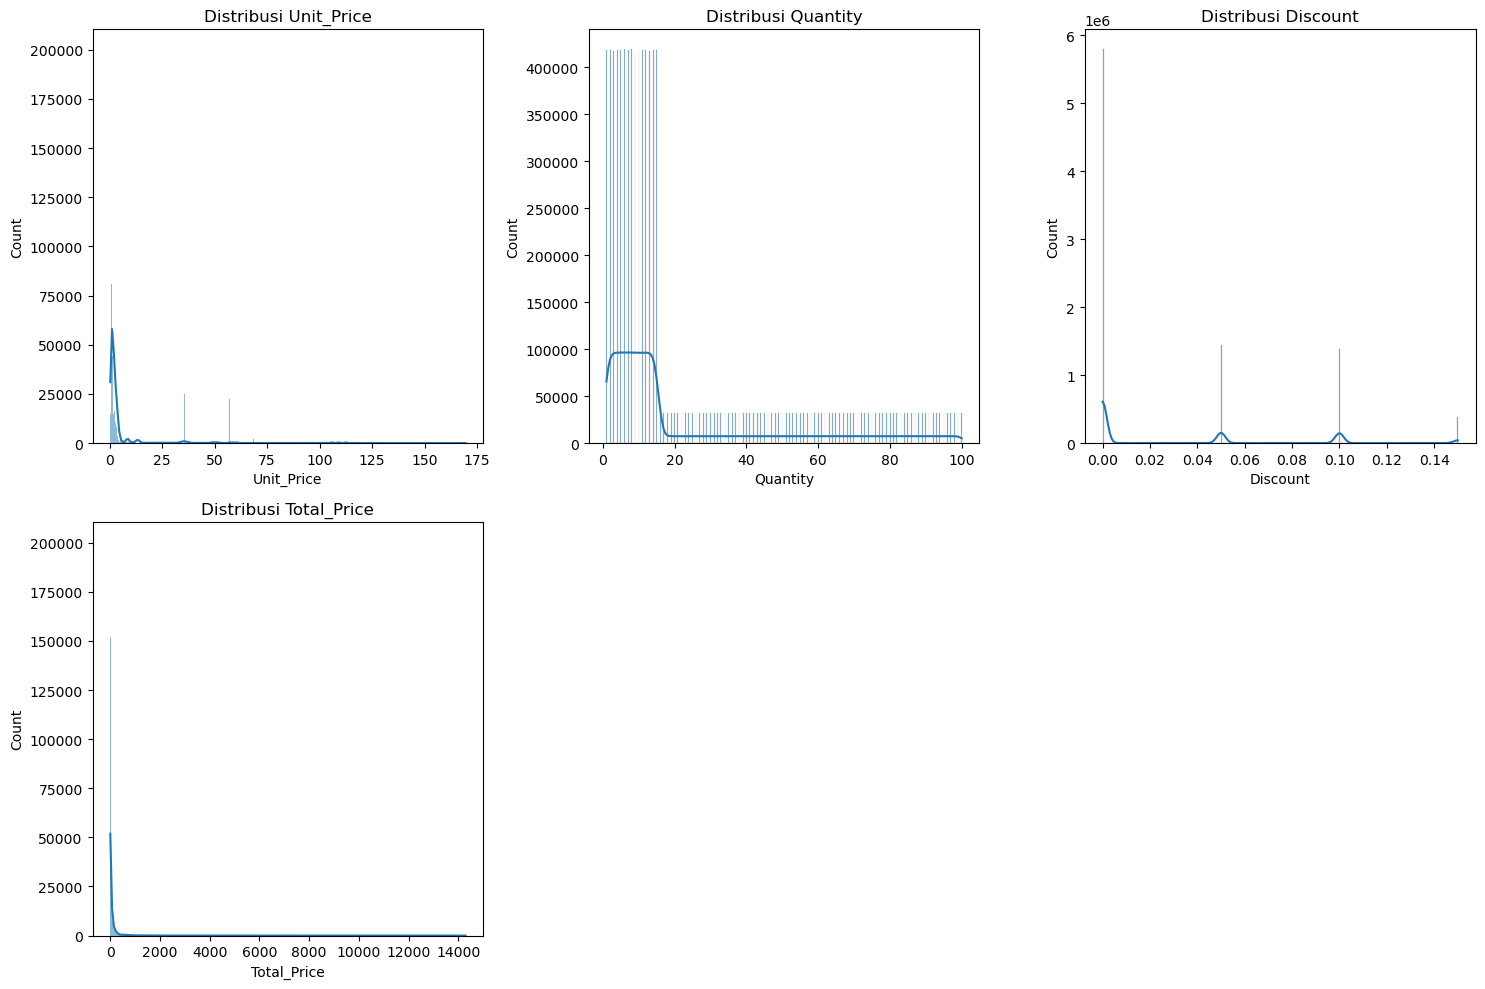

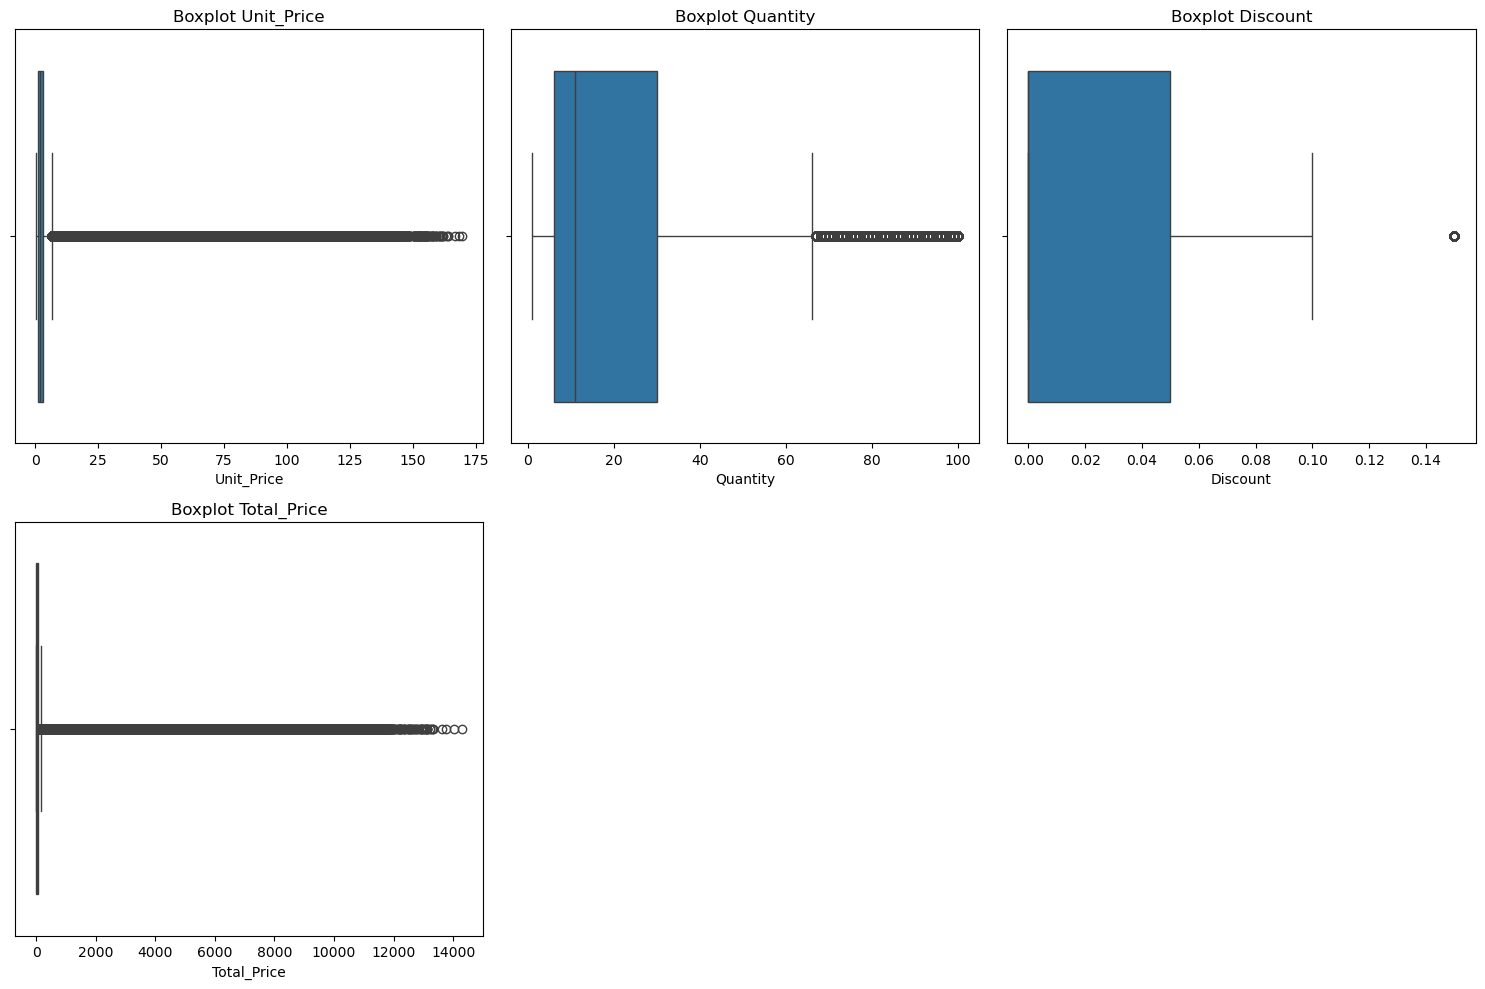

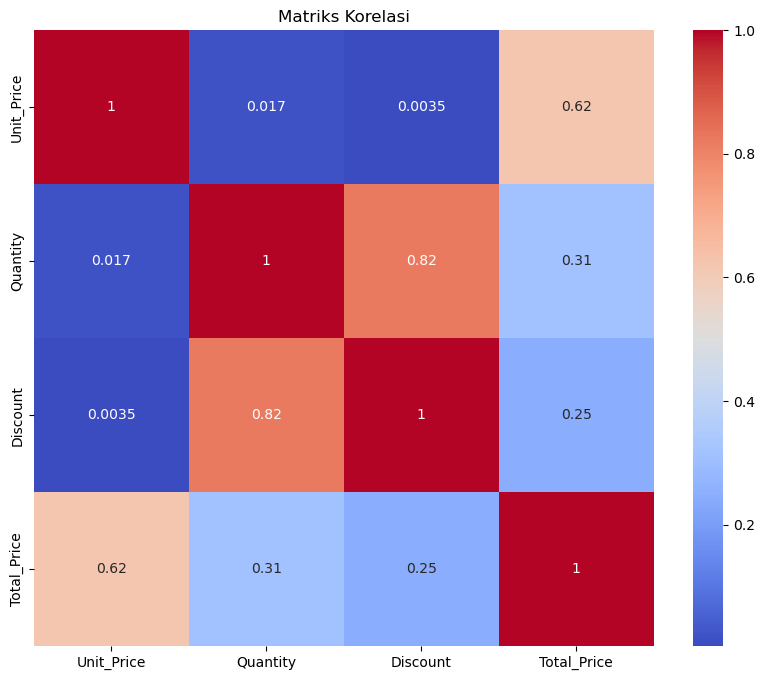

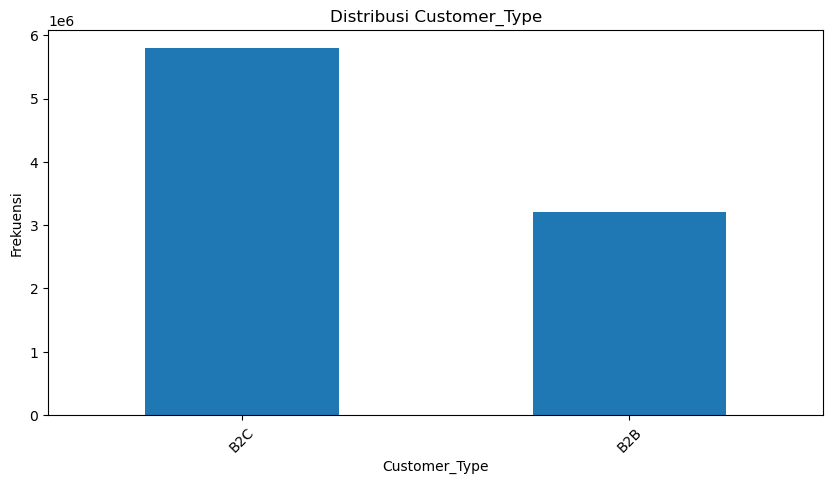

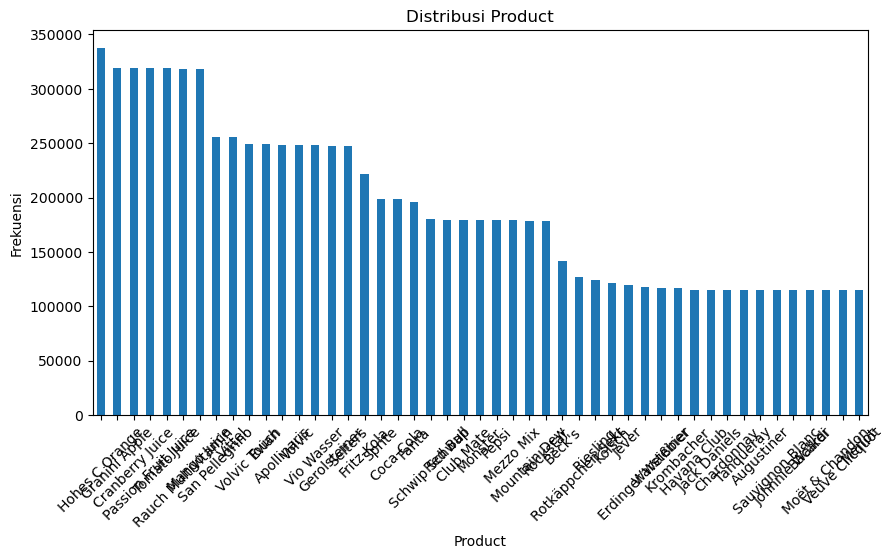

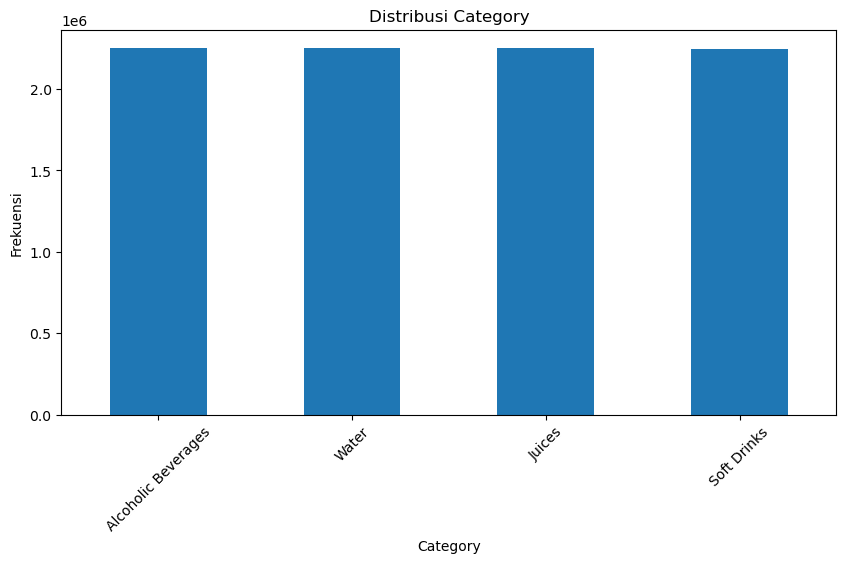

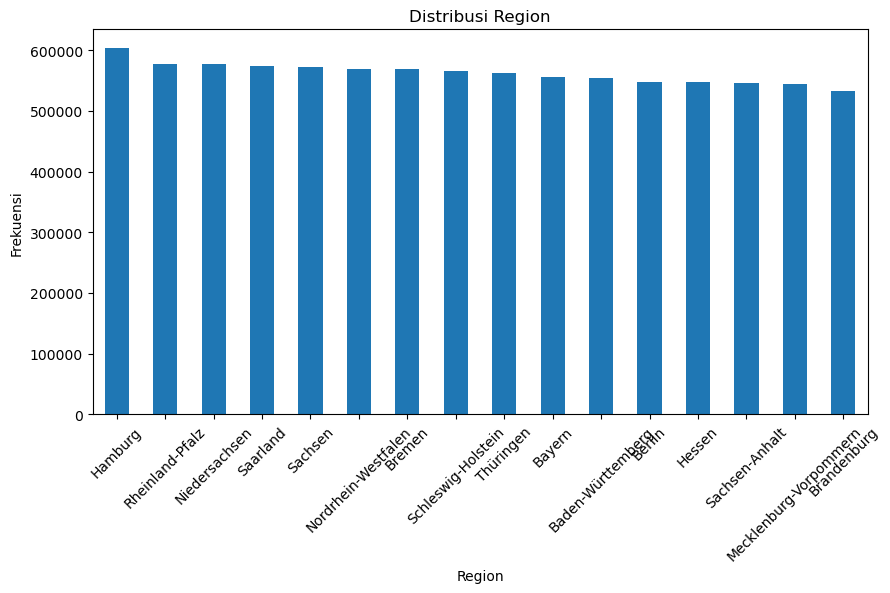

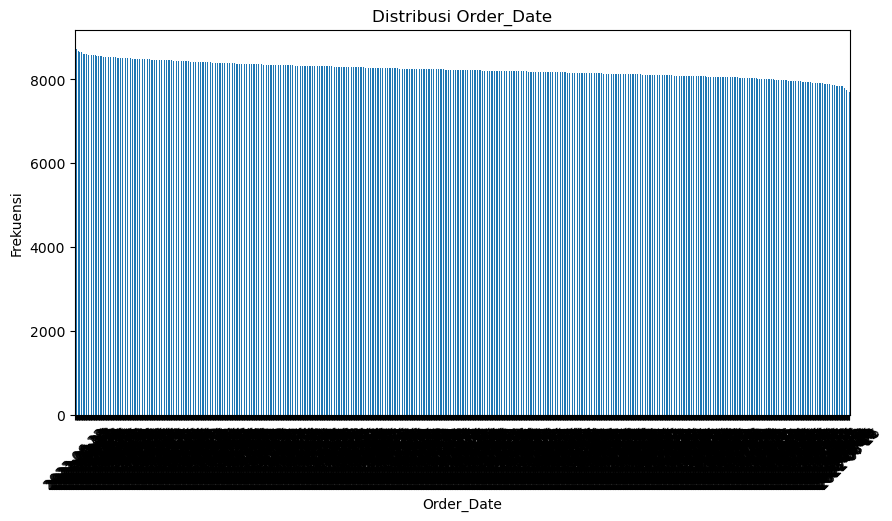

In [39]:
print(df.isnull().sum())
df.describe(include='all') 
df.info()
plt.figure(figsize=(15,10))

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

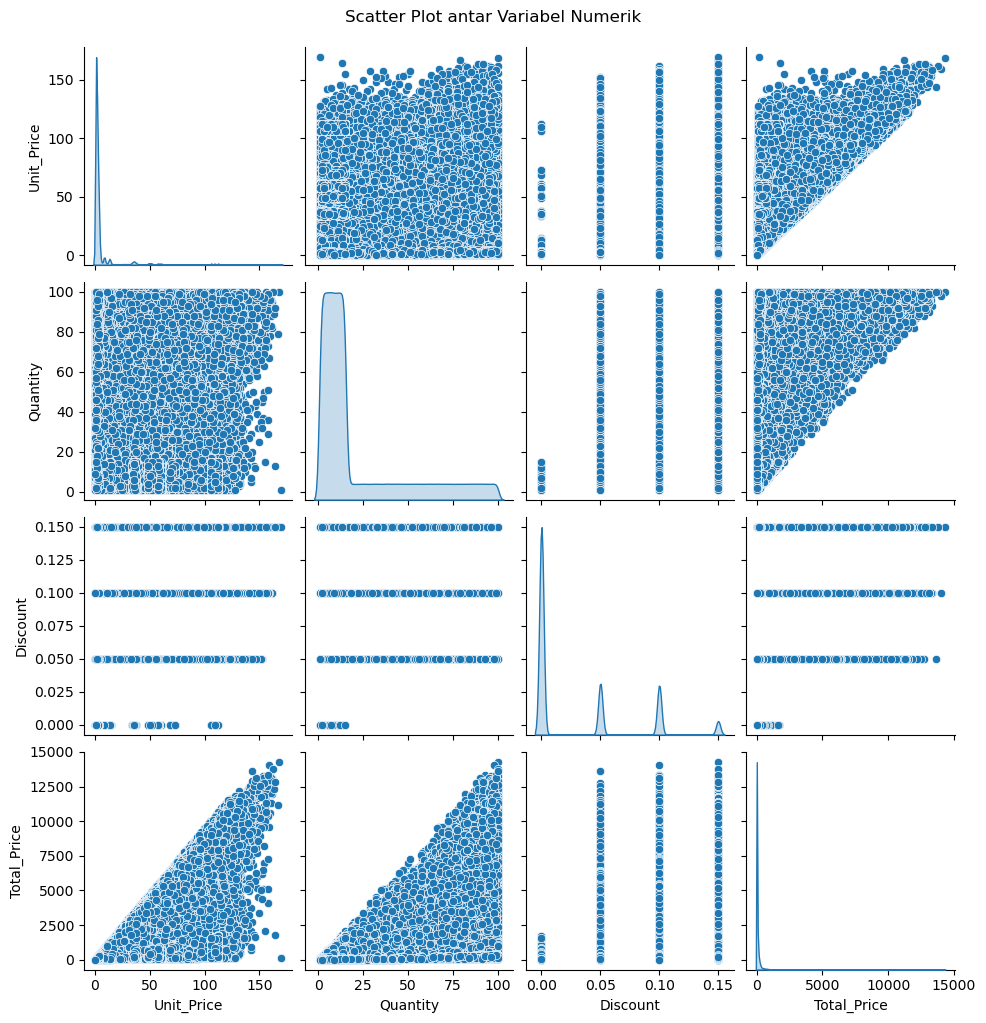

In [40]:
sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Plot antar Variabel Numerik', y=1.02)
plt.show()
#maaf laptop saya tidak mampu membuka semuanya, kadang bisa kadang engga

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

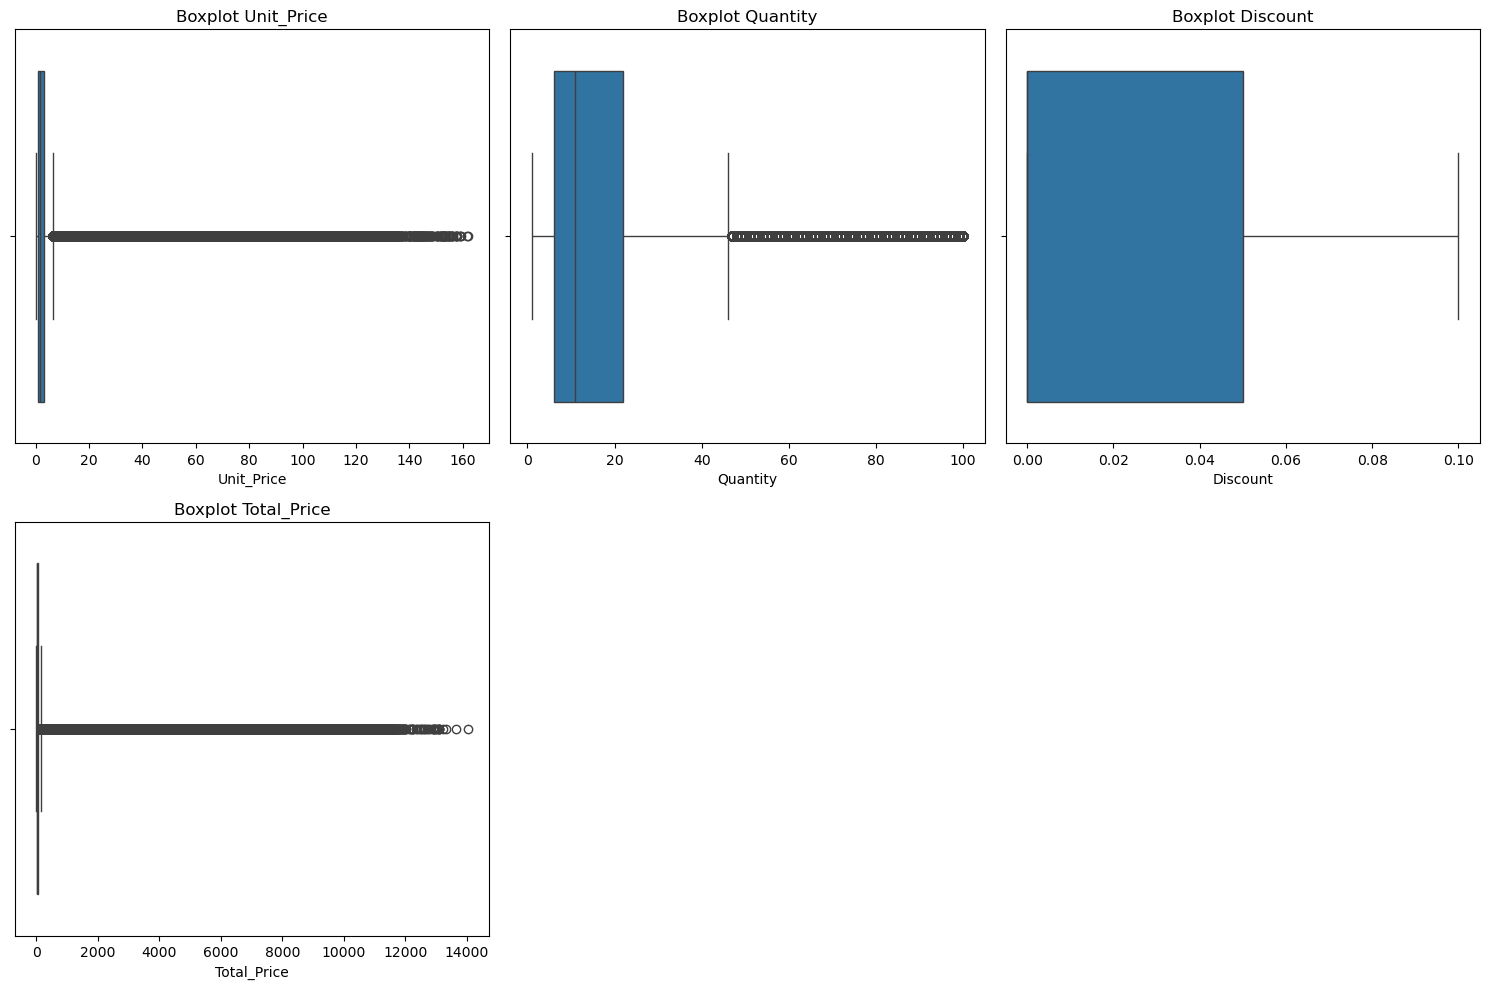

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11108\183007596.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Total_Price_Bin'], bins = pd.qcut(subset_df['Total_Price'],
C:\Users\ichaa\AppData\Local\Temp\ipykernel_11108\183007596.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Price_Bin'], bins = pd.qcut(subset_df['Unit_Price'],
C:\Users\ichaa\AppData\Local\Temp\ipykernel_11108\183007596.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Jumlah Baris: 8618893
Jumlah Kolom: 5

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 8618893 entries, 0 to 8999909
Data columns (total 5 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Category         object  
 1   Product          object  
 2   Total_Price_Bin  category
 3   Price_Bin        category
 4   Quantity_Bin     category
dtypes: category(3), object(2)
memory usage: 221.9+ MB
None

Ukuran Dataset: (8618893, 5)
Index(['Category', 'Product', 'Total_Price_Bin', 'Price_Bin', 'Quantity_Bin'], dtype='object')
            Category              Product Total_Price_Bin Price_Bin  \
0              Water           Vio Wasser            High  Standard   
1              Water                Evian       Very High  Standard   
2        Soft Drinks               Sprite            High   Economy   
3             Juices   Rauch Multivitamin       Very High   Premium   
4              Water         Gerolsteiner          Medium    Budget   
...    

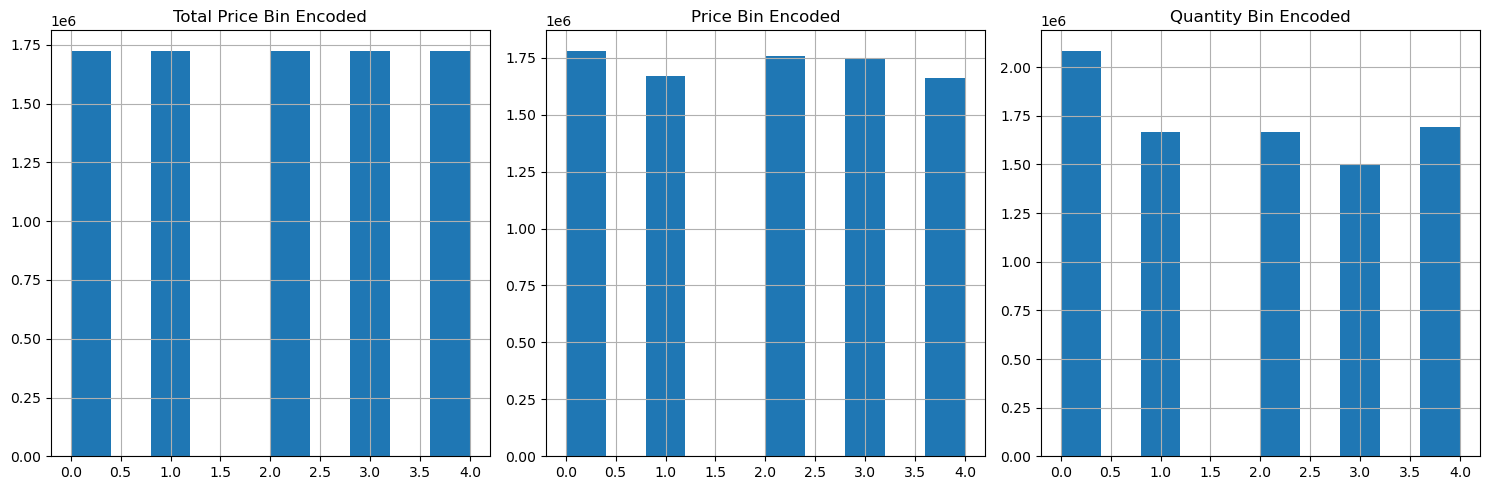

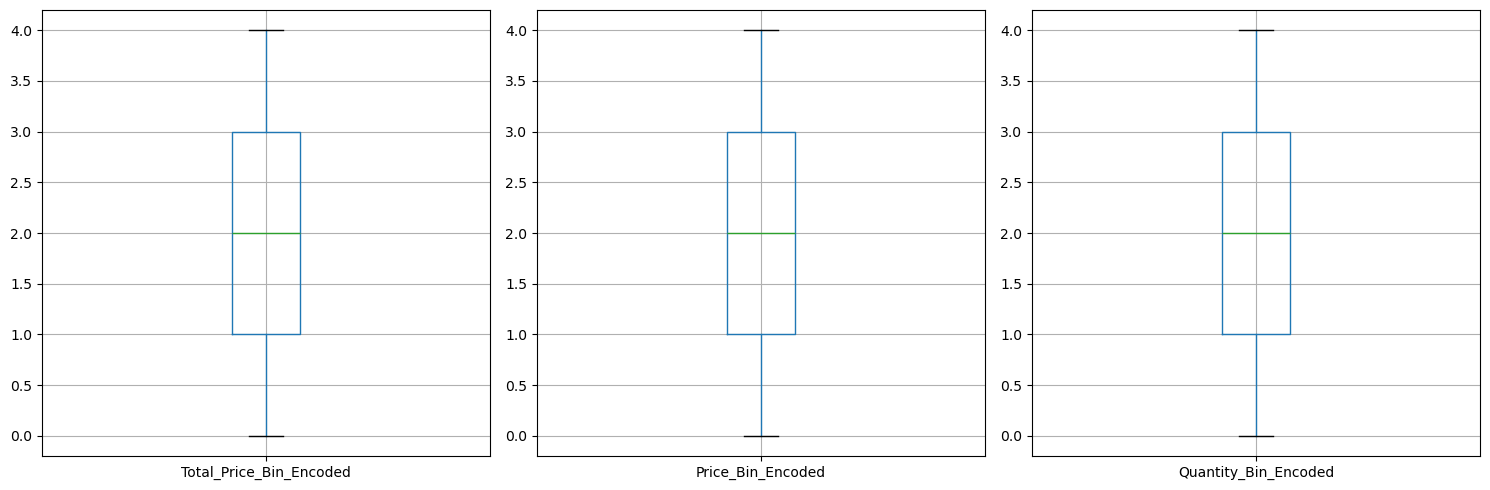

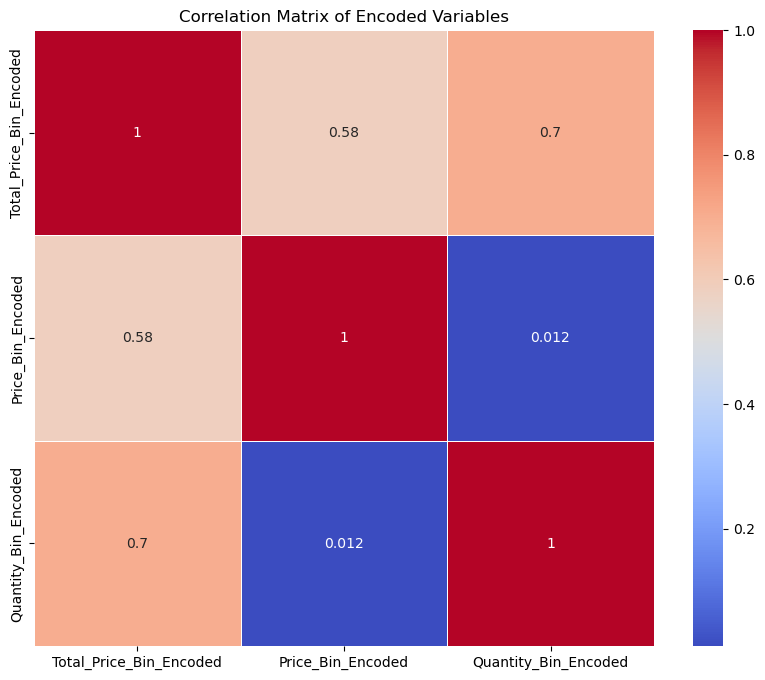

Distribusi sebelum sampling:
Price_Bin_Encoded
0    0.206672
2    0.204096
3    0.203081
1    0.193615
4    0.192536
Name: proportion, dtype: float64

Distribusi setelah sampling:
Price_Bin_Encoded
0    0.2
2    0.2
3    0.2
1    0.2
4    0.2
Name: proportion, dtype: float64


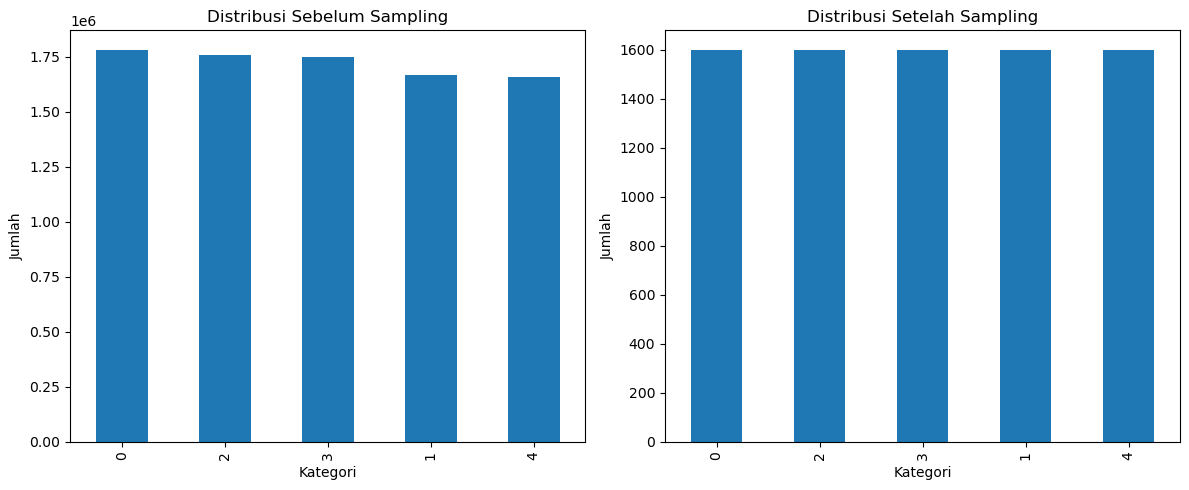

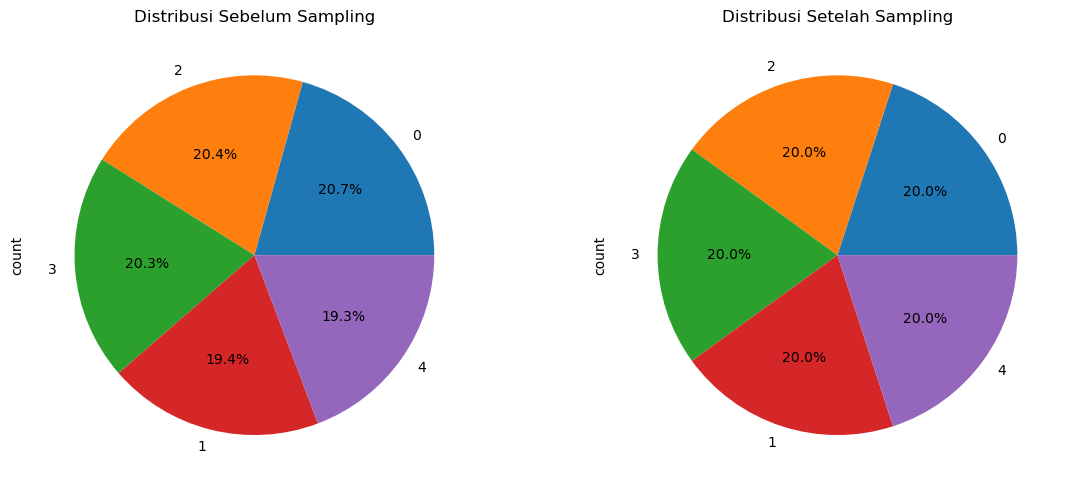


Chi-square Test:
Chi-square statistic: 6.74755620284385
p-value: 0.1498454406575187


,Category,Product,Total_Price_Bin_Encoded,Price_Bin_Encoded,Quantity_Bin_Encoded
7083190,Water,Selters,0,0,0
6812066,Water,Vittel,0,0,0
6185318,Water,Vittel,0,0,0
3404951,Alcoholic Beverages,Kölsch,1,0,3
2180115,Water,Apollinaris,0,0,1


In [41]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = (df['Discount']).quantile(0.25)
Q3 = (df['Discount']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = df['Discount'] < minimum
kondisi_more_than = df['Discount'] > maximum
 
df.drop(df[kondisi_more_than].index, inplace=True)

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

selected_features = ['Unit_Price', 'Quantity', 'Category', 'Product', 'Total_Price']
subset_df = df[selected_features]
subset_df.head()

subset_df['Total_Price_Bin'], bins = pd.qcut(subset_df['Total_Price'], 
                                             q=5, 
                                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], 
                                             retbins=True)
subset_df.head()

subset_df['Price_Bin'], bins = pd.qcut(subset_df['Unit_Price'], 
                                    q=5, 
                                    labels=['Budget', 'Economy', 'Standard', 'Premium', 'Luxury'],
                                    retbins=True)

subset_df['Quantity_Bin'], bins = pd.qcut(subset_df['Quantity'], 
                                       q=5, 
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],retbins=True)

subset_df.head()

subset_df = subset_df.drop(columns=['Unit_Price', 'Quantity', 'Total_Price'])

subset_df.head()

print("Jumlah Baris:", len(subset_df))
print("Jumlah Kolom:", len(subset_df.columns))
print("\nInformasi Dataset:")
print(subset_df.info())
print("\nUkuran Dataset:", subset_df.shape)

print(subset_df.columns)

total_price_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
price_order = ['Budget', 'Economy', 'Standard', 'Premium', 'Luxury']
quantity_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

subset_df['Total_Price_Bin_Encoded'] = pd.Categorical(subset_df['Total_Price_Bin'], categories=total_price_order, ordered=True).codes
subset_df['Price_Bin_Encoded'] = pd.Categorical(subset_df['Price_Bin'], categories=price_order, ordered=True).codes
subset_df['Quantity_Bin_Encoded'] = pd.Categorical(subset_df['Quantity_Bin'], categories=quantity_order, ordered=True).codes

print(subset_df)

print(subset_df[['Total_Price_Bin_Encoded', 'Price_Bin_Encoded', 'Quantity_Bin_Encoded']].describe())

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subset_df['Total_Price_Bin_Encoded'].hist(ax=axes[0])
axes[0].set_title('Total Price Bin Encoded')
subset_df['Price_Bin_Encoded'].hist(ax=axes[1])
axes[1].set_title('Price Bin Encoded')
subset_df['Quantity_Bin_Encoded'].hist(ax=axes[2])
axes[2].set_title('Quantity Bin Encoded')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subset_df.boxplot(column='Total_Price_Bin_Encoded', ax=axes[0])
subset_df.boxplot(column='Price_Bin_Encoded', ax=axes[1])
subset_df.boxplot(column='Quantity_Bin_Encoded', ax=axes[2])
plt.tight_layout()
plt.show()

correlation_matrix = subset_df[['Total_Price_Bin_Encoded', 'Price_Bin_Encoded', 'Quantity_Bin_Encoded']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Encoded Variables')
plt.show()
subset_df.head()
def balanced_sampling(subset_df, sample_size=8000, stratify_column=None):
    if stratify_column is None:
        return subset_df.sample(n=sample_size)

    category_counts = subset_df[stratify_column].value_counts()
    
    total_categories = len(category_counts)
    base_sample_size = sample_size // total_categories
    
    samples_per_category = {}
    for category in category_counts.index:
        samples_per_category[category] = base_sample_size
    
    remaining_samples = sample_size - sum(samples_per_category.values())
    for category in category_counts.index[:remaining_samples]:
        samples_per_category[category] += 1
    
    sampled_df = pd.DataFrame()
    
    for category, n_samples in samples_per_category.items():
        category_df = subset_df[subset_df[stratify_column] == category]
        sampled_category = category_df.sample(n=min(n_samples, len(category_df)))
        sampled_df = pd.concat([sampled_df, sampled_category])
    
    return sampled_df

sampled_data = balanced_sampling(
    subset_df,
    sample_size=8000, 
    stratify_column='Price_Bin_Encoded'
)

print("Distribusi sebelum sampling:")
print(subset_df['Price_Bin_Encoded'].value_counts(normalize=True))

print("\nDistribusi setelah sampling:")
print(sampled_data['Price_Bin_Encoded'].value_counts(normalize=True))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
subset_df['Price_Bin_Encoded'].value_counts().plot(kind='bar')
plt.title('Distribusi Sebelum Sampling')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

plt.subplot(1,2,2)
sampled_data['Price_Bin_Encoded'].value_counts().plot(kind='bar')
plt.title('Distribusi Setelah Sampling')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
subset_df['Price_Bin_Encoded'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Sebelum Sampling')

plt.subplot(1,2,2)
sampled_data['Price_Bin_Encoded'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Setelah Sampling')

plt.tight_layout()
plt.show()

from scipy.stats import chi2_contingency

before_freq = subset_df['Price_Bin_Encoded'].value_counts()
after_freq = sampled_data['Price_Bin_Encoded'].value_counts()

contingency_table = pd.DataFrame({
    'Sebelum': before_freq,
    'Setelah': after_freq
})

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

sampled_data.head()
sampled_data = sampled_data.drop(columns=['Price_Bin', 'Quantity_Bin', 'Total_Price_Bin'])
sampled_data.head()



# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [42]:
features = [
    'Total_Price_Bin_Encoded', 
    'Price_Bin_Encoded', 
    'Quantity_Bin_Encoded'
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(sampled_data[features])

kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_features)
silhouette_score_3 = silhouette_score(scaled_features, clusters_3)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_features)
silhouette_score_4 = silhouette_score(scaled_features, clusters_4)

kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(scaled_features)
silhouette_score_5 = silhouette_score(scaled_features, clusters_5)

print("Silhouette Score 3 Cluster:", silhouette_score_3)
print("Silhouette Score 4 Cluster:", silhouette_score_4)
print("Silhouette Score 4 Cluster:", silhouette_score_5)

dbscan = DBSCAN(eps=0.7, min_samples=9)
dbscan_labels = dbscan.fit_predict(scaled_features)
silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)

print("Silhouette Score DBSCAN:", silhouette_dbscan)


n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print("Jumlah cluster yang terbentuk oleh DBSCAN:", n_clusters)

import numpy as np

print("Unique labels in DBSCAN:", np.unique(dbscan_labels))

from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=7)  # Coba 3 cluster dulu
agglo_labels = agglo.fit_predict(scaled_features)

silhouette_agglo = silhouette_score(scaled_features, agglo_labels)
print("Silhouette Score Agglomerative:", silhouette_agglo)

categorical_features = ['Category', 'Product']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(sampled_data[categorical_features])

encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

final_features = pd.concat([encoded_df, sampled_data[features].reset_index(drop=True)], axis=1)

scaled_features = scaler.fit_transform(final_features)

kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_features)
silhouette_score_3 = silhouette_score(scaled_features, clusters_3)

# Untuk 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_features)
silhouette_score_4 = silhouette_score(scaled_features, clusters_4)

print("Silhouette Score 3 Cluster:", silhouette_score_3)
print("Silhouette Score 4 Cluster:", silhouette_score_4)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Sesuaikan jumlah komponen
reduced_features = pca.fit_transform(scaled_features)

kmeans_3 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(reduced_features)
silhouette_3 = silhouette_score(reduced_features, clusters_3)

print("Silhouette Score setelah PCA (4 Cluster):", silhouette_3)

Silhouette Score 3 Cluster: 0.3808136084555384
Silhouette Score 4 Cluster: 0.40372793361511294
Silhouette Score 4 Cluster: 0.3742774710179345
Silhouette Score DBSCAN: 0.5111026459634291
Jumlah cluster yang terbentuk oleh DBSCAN: 24
Unique labels in DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]
Silhouette Score Agglomerative: 0.36377300049325434
Silhouette Score 3 Cluster: 0.07178731021663974
Silhouette Score 4 Cluster: 0.08855779949906767
Silhouette Score setelah PCA (4 Cluster): 0.780223970446298


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [43]:
silhouette_3 = silhouette_score(reduced_features, clusters_3)

print("Silhouette Score setelah PCA (3 Cluster):", silhouette_3)

Silhouette Score setelah PCA (3 Cluster): 0.780223970446298


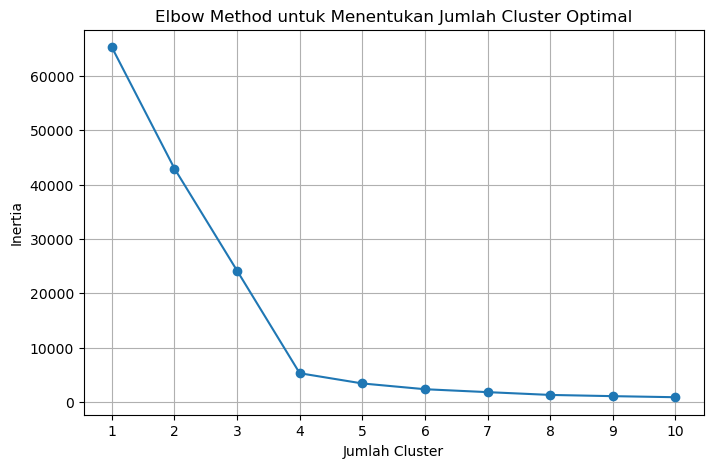

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range jumlah cluster yang akan diuji
cluster_range = range(1, 11)
inertia_values = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_features)
    inertia_values.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [45]:
#Feature Selection di lakukan secara statik (ada di program). di karenakan tujuan utama adalah segmentasi barang, maka beberapa fitur utama/asli dihilangkan. awalnya coloumn customer_type ingin di masukkan tetapi setelah dilakukan perbandingan ternyata coloumn category lebih baik.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

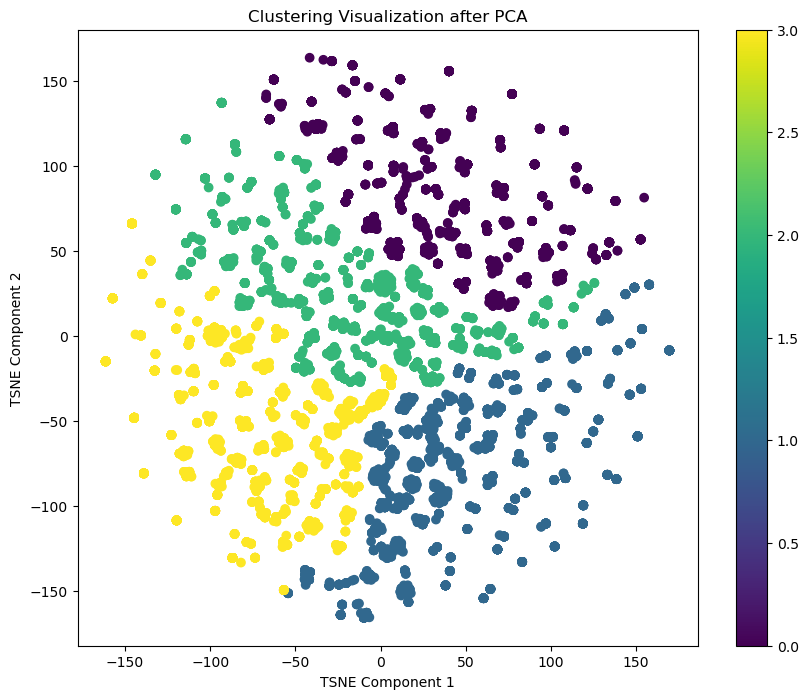

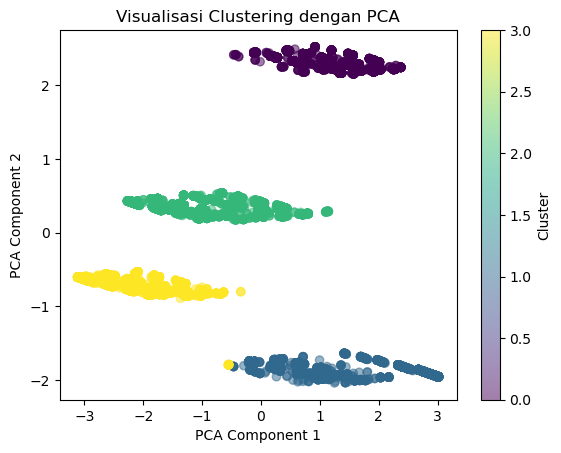

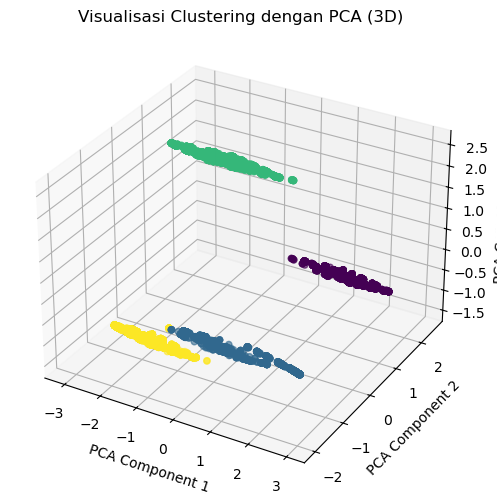

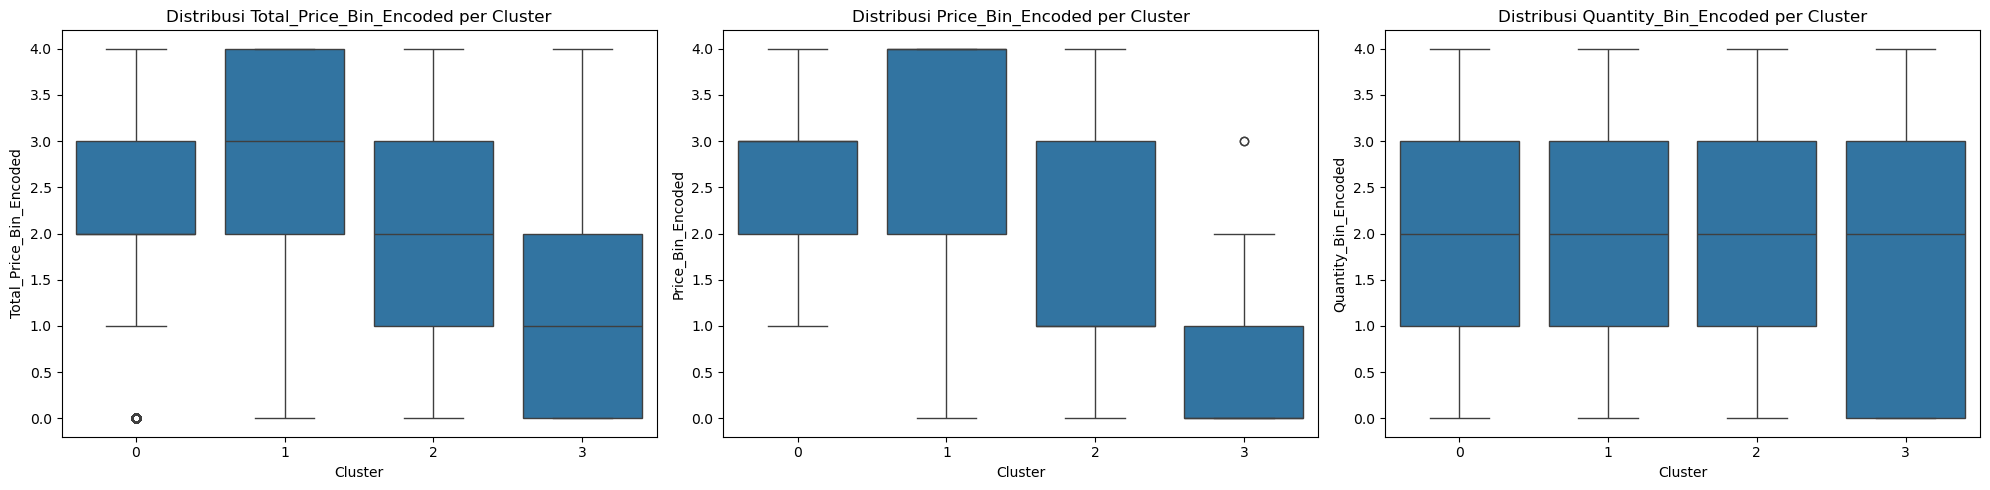

C:\Users\ichaa\AppData\Local\Temp\ipykernel_11108\1595478557.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


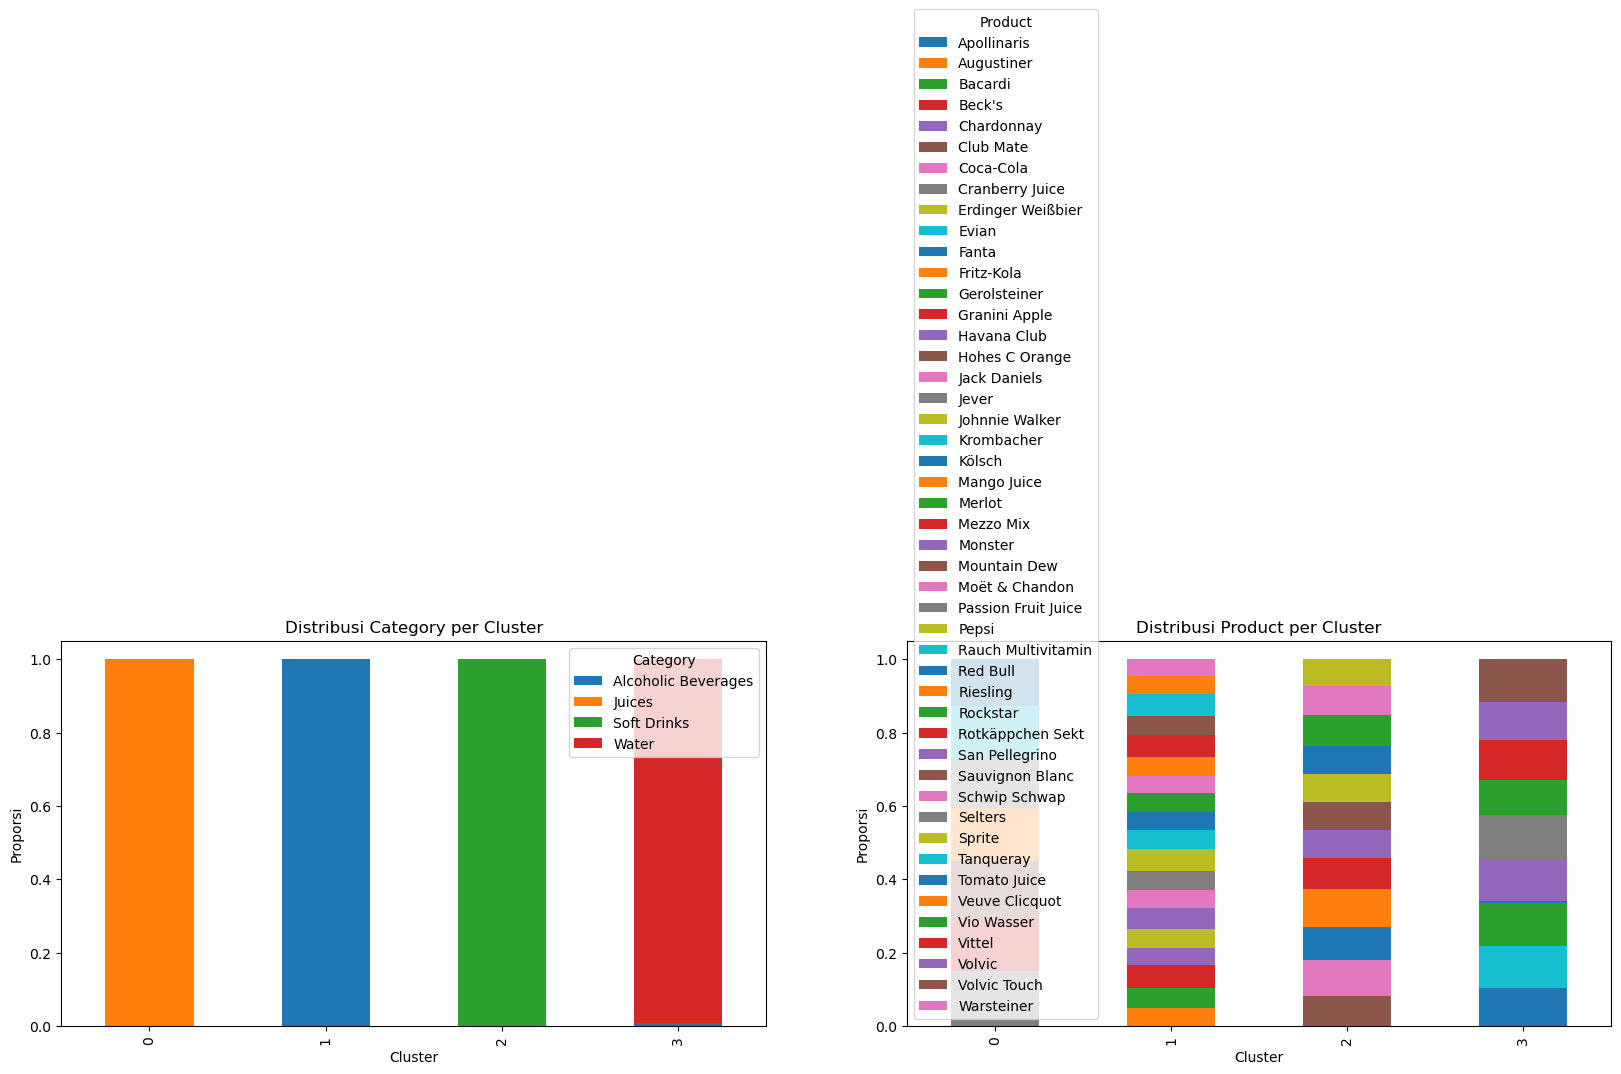

Statistik Fitur Numerik per Cluster:
        Total_Price_Bin_Encoded                  Price_Bin_Encoded         \
                           mean median       std              mean median   
Cluster                                                                     
0                      2.310540    2.0  1.201515          2.808740    3.0   
1                      2.878655    3.0  1.323527          3.093567    4.0   
2                      1.666833    2.0  1.301826          1.517259    1.0   
3                      1.161178    1.0  1.193036          0.576846    0.0   

                  Quantity_Bin_Encoded                   
              std                 mean median       std  
Cluster                                                  
0        0.689744             1.878149    2.0  1.434101  
1        1.275741             1.911793    2.0  1.444409  
2        1.125097             1.871936    2.0  1.439681  
3        0.691279             1.835828    2.0  1.453041  

Distribusi Categ

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Visualisasi dengan TSNE
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(reduced_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], 
                      c=clusters_3, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clustering Visualization after PCA')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters_3, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Clustering dengan PCA')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], 
           c=clusters_3, cmap='viridis', alpha=0.6)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Visualisasi Clustering dengan PCA (3D)')

plt.show()

sampled_data['Cluster'] = kmeans_3.labels_

import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk visualisasi distribusi fitur numerik
def plot_feature_distribution(data, cluster_column, numeric_features):
    # Siapkan subplot
    n_features = len(numeric_features)
    fig, axes = plt.subplots(1, n_features, figsize=(20, 5))
    
    # Iterasi setiap fitur
    for i, feature in enumerate(numeric_features):
        # Box plot
        sns.boxplot(x=cluster_column, y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Distribusi {feature} per Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(feature)
    
    plt.tight_layout()
    plt.show()

# Fungsi untuk distribusi kategorik
def plot_categorical_distribution(data, cluster_column, categorical_features):
    # Siapkan subplot
    n_features = len(categorical_features)
    fig, axes = plt.subplots(1, n_features, figsize=(20, 5))
    
    # Iterasi setiap fitur kategorik
    for i, feature in enumerate(categorical_features):
        # Hitung proporsi di setiap cluster
        dist = pd.crosstab(data[cluster_column], data[feature], normalize='index')
        dist.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(f'Distribusi {feature} per Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Proporsi')
    
    plt.tight_layout()
    plt.show()

# Identifikasi fitur numerik dan kategorik
numeric_features = ['Total_Price_Bin_Encoded', 'Price_Bin_Encoded', 'Quantity_Bin_Encoded']
categorical_features = ['Category', 'Product']

# Visualisasi distribusi numerik
plot_feature_distribution(sampled_data, 'Cluster', numeric_features)

# Visualisasi distribusi kategorik
plot_categorical_distribution(sampled_data, 'Cluster', categorical_features)

# Statistik deskriptif per cluster
def cluster_feature_stats(data, cluster_column, features):
    # Statistik untuk fitur numerik
    numeric_stats = data.groupby(cluster_column)[features].agg(['mean', 'median', 'std'])
    print("Statistik Fitur Numerik per Cluster:")
    print(numeric_stats)
    
    # Distribusi untuk fitur kategorik
    for feature in categorical_features:
        print(f"\nDistribusi {feature} per Cluster:")
        print(pd.crosstab(data[cluster_column], data[feature], normalize='index'))

# Jalankan analisis statistik
cluster_feature_stats(sampled_data, 'Cluster', numeric_features)


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [47]:
sampled_data['Cluster'] = kmeans_3.labels_

In [48]:
sampled_data.head()

,Category,Product,Total_Price_Bin_Encoded,Price_Bin_Encoded,Quantity_Bin_Encoded,Cluster
7083190,Water,Selters,0,0,0,3
6812066,Water,Vittel,0,0,0,3
6185318,Water,Vittel,0,0,0,3
3404951,Alcoholic Beverages,Kölsch,1,0,3,1
2180115,Water,Apollinaris,0,0,1,3


Tidak dilakukan normalisasi dikarenakan data normalisasi dipisah saat melakukan Scalling dan PCA, kemudian tujuan dari segementasi dan clustering tidak berpaku pada nilai asli (numerik) sehingga hanya dilakukan proses mengembalikan dengan melakukan mapping setelah data sebelumnya sudah dilakukan Encoding.

In [49]:
total_price_map = {
    0: 'Very Low', 
    1: 'Low', 
    2: 'Medium', 
    3: 'High', 
    4: 'Very High'
}

price_map = {
    0: 'Budget', 
    1: 'Economy', 
    2: 'Standard', 
    3: 'Premium', 
    4: 'Luxury'
}

quantity_map = {
    0: 'Very Low', 
    1: 'Low', 
    2: 'Medium', 
    3: 'High', 
    4: 'Very High'
}

sampled_data['Total_Price_Bin'] = sampled_data['Total_Price_Bin_Encoded'].map(total_price_map)
sampled_data['Price_Bin'] = sampled_data['Price_Bin_Encoded'].map(price_map)
sampled_data['Quantity_Bin'] = sampled_data['Quantity_Bin_Encoded'].map(quantity_map)

In [50]:
sampled_data.head()

,Category,Product,Total_Price_Bin_Encoded,Price_Bin_Encoded,Quantity_Bin_Encoded,Cluster,Total_Price_Bin,Price_Bin,Quantity_Bin
7083190,Water,Selters,0,0,0,3,Very Low,Budget,Very Low
6812066,Water,Vittel,0,0,0,3,Very Low,Budget,Very Low
6185318,Water,Vittel,0,0,0,3,Very Low,Budget,Very Low
3404951,Alcoholic Beverages,Kölsch,1,0,3,1,Low,Budget,High
2180115,Water,Apollinaris,0,0,1,3,Very Low,Budget,Low


In [51]:
sampled_data = sampled_data.drop(columns=['Total_Price_Bin_Encoded', 'Price_Bin_Encoded', 'Quantity_Bin_Encoded'])

In [52]:
sampled_data.head()

,Category,Product,Cluster,Total_Price_Bin,Price_Bin,Quantity_Bin
7083190,Water,Selters,3,Very Low,Budget,Very Low
6812066,Water,Vittel,3,Very Low,Budget,Very Low
6185318,Water,Vittel,3,Very Low,Budget,Very Low
3404951,Alcoholic Beverages,Kölsch,1,Low,Budget,High
2180115,Water,Apollinaris,3,Very Low,Budget,Low


Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [53]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [54]:
# Distribusi Cluster
print("Distribusi Cluster:")
print(sampled_data['Cluster'].value_counts())

# Karakteristik Cluster
cluster_summary = sampled_data.groupby('Cluster').agg({
    'Total_Price_Bin': lambda x: x.value_counts().index[0],
    'Price_Bin': lambda x: x.value_counts().index[0],
    'Quantity_Bin': lambda x: x.value_counts().index[0],
    'Category': 'count',
    'Product': lambda x: x.value_counts().index[0]
})

print("\nRingkasan Cluster:")
print(cluster_summary)

# Analisis lebih detail
cluster_details = sampled_data.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)
print("\nDistribusi Kategori per Cluster:")
print(cluster_details)

Distribusi Cluster:
Cluster
1    2052
3    2004
2    1999
0    1945
Name: count, dtype: int64

Ringkasan Cluster:
        Total_Price_Bin Price_Bin Quantity_Bin  Category         Product
Cluster                                                                 
0                Medium   Premium     Very Low      1945  Hohes C Orange
1             Very High    Luxury     Very Low      2052          Beck's
2                   Low   Economy     Very Low      1999      Fritz-Kola
3              Very Low    Budget     Very Low      2004         Selters

Distribusi Kategori per Cluster:
Category  Alcoholic Beverages  Juices  Soft Drinks  Water
Cluster                                                  
0                           0    1945            0      0
1                        2052       0            0      0
2                           0       0         1999      0
3                          16       0            0   1988


In [55]:
# Distribusi Jumlah Data per Cluster
cluster_distribution = sampled_data['Cluster'].value_counts()
print("Distribusi Jumlah Data per Cluster:")
print(cluster_distribution)
print("\nPersentase Distribusi:")
print(cluster_distribution / len(sampled_data) * 100)

Distribusi Jumlah Data per Cluster:
Cluster
1    2052
3    2004
2    1999
0    1945
Name: count, dtype: int64

Persentase Distribusi:
Cluster
1    25.6500
3    25.0500
2    24.9875
0    24.3125
Name: count, dtype: float64


In [56]:
# Distribusi Kategori dalam Setiap Cluster
category_cluster_dist = pd.crosstab(sampled_data['Cluster'], sampled_data['Category'], normalize='index') * 100
print("\nDistribusi Kategori dalam Cluster (%):")
print(category_cluster_dist)


Distribusi Kategori dalam Cluster (%):
Category  Alcoholic Beverages  Juices  Soft Drinks      Water
Cluster                                                      
0                    0.000000   100.0          0.0   0.000000
1                  100.000000     0.0          0.0   0.000000
2                    0.000000     0.0        100.0   0.000000
3                    0.798403     0.0          0.0  99.201597


In [57]:
# Distribusi Bin dalam Setiap Cluster
def bin_distribution(column):
    return pd.crosstab(sampled_data['Cluster'], sampled_data[column], normalize='index') * 100

print("\nDistribusi Total Price Bin per Cluster (%):")
print(bin_distribution('Total_Price_Bin'))

print("\nDistribusi Price Bin per Cluster (%):")
print(bin_distribution('Price_Bin'))

print("\nDistribusi Quantity Bin per Cluster (%):")
print(bin_distribution('Quantity_Bin'))


Distribusi Total Price Bin per Cluster (%):
Total_Price_Bin       High        Low     Medium  Very High   Very Low
Cluster                                                               
0                27.197943  15.269923  29.665810  18.714653   9.151671
1                20.467836  10.769981  13.499025  47.173489   8.089669
2                18.209105  24.412206  22.911456  10.455228  24.012006
3                12.774451  28.193613  16.117764   4.341317  38.572854

Distribusi Price Bin per Cluster (%):
Price_Bin     Budget    Economy     Luxury    Premium   Standard
Cluster                                                         
0           0.000000   1.902314  14.138817  54.498715  29.460154
1           2.095517  16.325536  63.840156   2.192982  15.545809
2          23.861931  26.713357   0.750375  24.662331  24.012006
3          53.892216  34.630739   0.000000   0.099800  11.377246

Distribusi Quantity Bin per Cluster (%):
Quantity_Bin       High        Low     Medium  Very High  

In [58]:
# Top 3 Produk dalam Setiap Cluster
def top_products(cluster):
    cluster_data = sampled_data[sampled_data['Cluster'] == cluster]
    return cluster_data['Product'].value_counts().head(3)

print("\nTop Produk per Cluster:")
for cluster in sampled_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(top_products(cluster))


Top Produk per Cluster:

Cluster 3:
Product
Selters         242
Volvic Touch    234
Evian           232
Name: count, dtype: int64

Cluster 1:
Product
Beck's              129
Rotkäppchen Sekt    126
Johnnie Walker      122
Name: count, dtype: int64

Cluster 2:
Product
Fritz-Kola    207
Coca-Cola     196
Fanta         182
Name: count, dtype: int64

Cluster 0:
Product
Hohes C Orange     304
Cranberry Juice    292
Granini Apple      281
Name: count, dtype: int64


In [59]:
# Ringkasan Cluster
cluster_summary = sampled_data.groupby('Cluster').agg({
    'Total_Price_Bin': ['count', lambda x: x.value_counts().index[0]],
    'Price_Bin': [lambda x: x.value_counts().index[0]],
    'Quantity_Bin': [lambda x: x.value_counts().index[0]],
    'Category': [lambda x: x.value_counts().index[0]]
})

print("\nRingkasan Karakteristik Cluster:")
print(cluster_summary)


Ringkasan Karakteristik Cluster:
        Total_Price_Bin            Price_Bin Quantity_Bin             Category
                  count <lambda_0>  <lambda>     <lambda>             <lambda>
Cluster                                                                       
0                  1945     Medium   Premium     Very Low               Juices
1                  2052  Very High    Luxury     Very Low  Alcoholic Beverages
2                  1999        Low   Economy     Very Low          Soft Drinks
3                  2004   Very Low    Budget     Very Low                Water


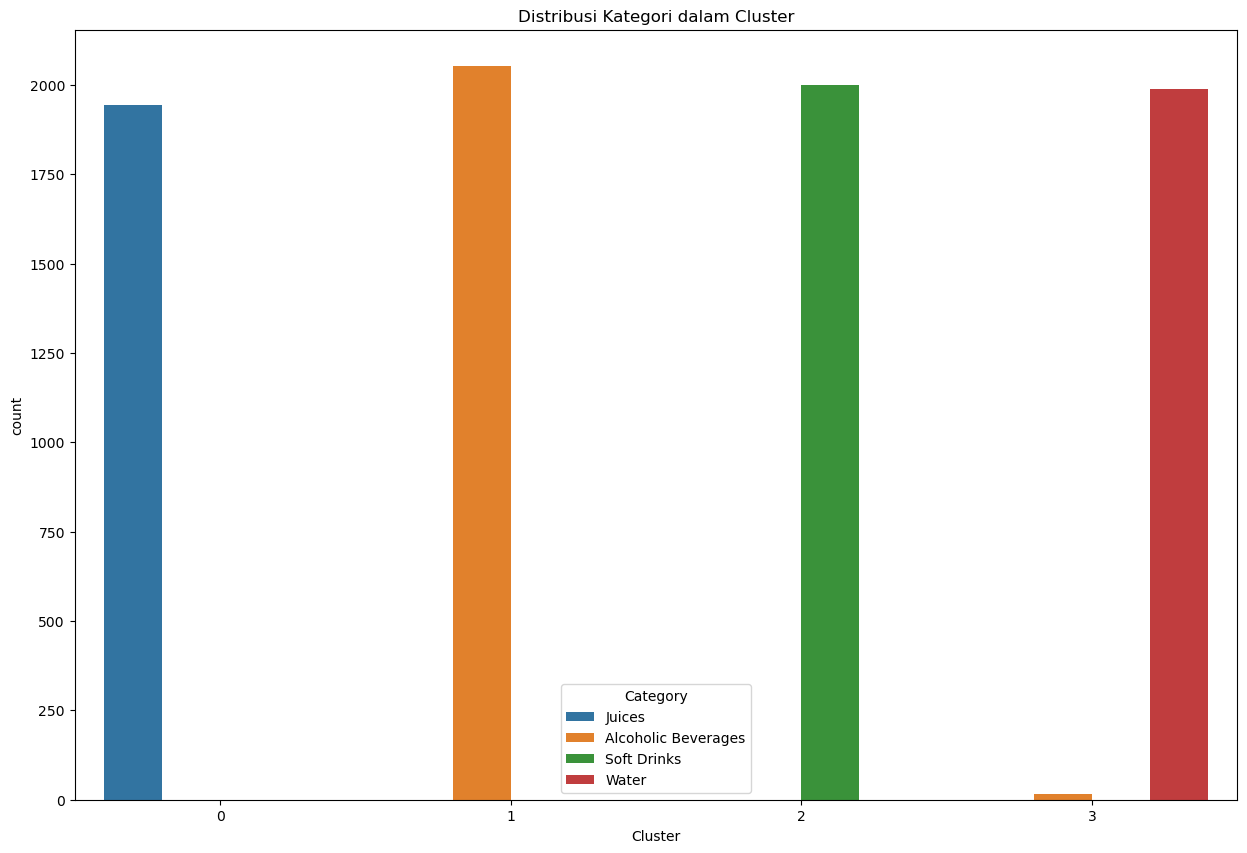

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.countplot(x='Cluster', hue='Category', data=sampled_data)
plt.title('Distribusi Kategori dalam Cluster')
plt.show()

### Interpretasi Hasil Clustering

1. **Distribusi Cluster:**
   - Distribusi cluster cukup seimbang, dengan cluster 3 memiliki sedikit lebih banyak data (25.69%) dan cluster 2 sedikit lebih sedikit (24.28%). Ini menunjukkan bahwa algoritma clustering berhasil membagi data menjadi kelompok yang relatif seimbang.

2. **Karakteristik Cluster:**
   - **Cluster 0 (Juices):** 
     - Dominan dengan kategori Juices (100%).
     - Total Price Bin: High
     - Price Bin: Premium
     - Quantity Bin: Very Low
     - Produk teratas: Rauch Multivitamin, Granini Apple, Hohes C Orange
     - Interpretasi: Cluster ini mencakup produk jus premium dengan harga tinggi dan kuantitas pembelian yang rendah.

   - **Cluster 1 (Soft Drinks):** 
     - Dominan dengan kategori Soft Drinks (100%).
     - Total Price Bin: Very Low
     - Price Bin: Economy
     - Quantity Bin: Very Low
     - Produk teratas: Fritz-Kola, Sprite, Fanta
     - Interpretasi: Cluster ini mencakup minuman ringan ekonomis dengan harga sangat rendah dan kuantitas pembelian yang rendah.

   - **Cluster 2 (Water):** 
     - Dominan dengan kategori Water (100%).
     - Total Price Bin: Very Low
     - Price Bin: Budget
     - Quantity Bin: Very Low
     - Produk teratas: Volvic, San Pellegrino, Volvic Touch
     - Interpretasi: Cluster ini mencakup air minum dengan harga sangat rendah dan kuantitas pembelian yang rendah.

   - **Cluster 3 (Alcoholic Beverages):** 
     - Dominan dengan kategori Alcoholic Beverages (100%).
     - Total Price Bin: Very High
     - Price Bin: Luxury
     - Quantity Bin: Very Low
     - Produk teratas: Rotkäppchen Sekt, Riesling, Beck's
     - Interpretasi: Cluster ini mencakup minuman beralkohol mewah dengan harga sangat tinggi dan kuantitas pembelian yang rendah.

3. **Distribusi Bin:**
   - **Total Price Bin:** Cluster 3 memiliki proporsi tertinggi di Very High (45.84%), sementara Cluster 2 memiliki proporsi tertinggi di Very Low (37.18%).
   - **Price Bin:** Cluster 3 memiliki proporsi tertinggi di Luxury (62.87%), sementara Cluster 2 memiliki proporsi tertinggi di Budget (54.94%).
   - **Quantity Bin:** Semua cluster memiliki proporsi tertinggi di Very Low, menunjukkan bahwa kuantitas pembelian umumnya rendah di semua cluster.

### Kesesuaian dengan Ekspektasi dan Logika Bisnis

- **Kesesuaian:** Hasil clustering tampaknya sesuai dengan ekspektasi dan logika bisnis. Setiap cluster mencerminkan kategori produk yang berbeda dengan karakteristik harga dan kuantitas yang konsisten.
- **Pola yang Bisa Dimanfaatkan:**
  - **Segmentasi Berdasarkan Kategori:** Setiap cluster mewakili kategori produk yang berbeda, yang bisa digunakan untuk segmentasi pasar berdasarkan preferensi konsumen.
  - **Segmentasi Berdasarkan Harga:** Cluster 0 dan 3 mencakup produk premium dan mewah, sementara Cluster 1 dan 2 mencakup produk ekonomis dan budget. Ini bisa digunakan untuk menargetkan konsumen berdasarkan sensitivitas harga.
  - **Segmentasi Berdasarkan Kuantitas:** Semua cluster memiliki kuantitas pembelian yang rendah, yang mungkin menunjukkan bahwa konsumen membeli produk ini dalam jumlah kecil, mungkin karena sifatnya yang mewah atau karena konsumsi pribadi.

Hasil clustering ini memberikan pembagian yang jelas dan logis dari data berdasarkan kategori produk, harga, dan kuantitas. Ini bisa menjadi dasar yang kuat untuk segmentasi pasar. Untuk tujuan klasifikasi, data ini sudah cukup informatif, tetapi analisis tambahan seperti yang disebutkan di atas bisa memberikan wawasan lebih mendalam dan memperkuat strategi segmentasi pasar Anda.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [61]:
# Simpan hasil clustering ke file CSV
sampled_data.to_csv("hasil_clustering.csv", index=False)